# 01. Importing libraries

In [14]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import requests
import json
from datetime import datetime
import zipfile
import chardet
from scipy.signal import find_peaks

# 02. Loading the file from Exercise 2.2

In [15]:
file_path = '/Users/renubalaji/Documents/GitHubProjects/Bike_rental_2018/merged_data_new.csv'

In [16]:
# Read in the CSV file
final_data = pd.read_csv(file_path)

In [17]:
# Print the first few rows to verify the data was loaded successfully
print(final_data.head())

    trip_id     start_time       end_time  bikeid tripduration  \
0  17536702  01/01/18 0:12  01/01/18 0:17    3304          323   
1  17536703  01/01/18 0:41  01/01/18 0:47    5367          377   
2  17536704  01/01/18 0:44  01/01/18 1:33    4599     2,904.00   
3  17536705  01/01/18 0:53  01/01/18 1:05    2302          747   
4  17536706  01/01/18 0:53  01/01/18 0:56    3696          183   

   from_station_id            from_station_name  to_station_id  \
0               69       Damen Ave & Pierce Ave            159   
1              253  Winthrop Ave & Lawrence Ave            325   
2               98   LaSalle St & Washington St            509   
3              125         Rush St & Hubbard St            364   
4              129    Blue Island Ave & 18th St            205   

                  to_station_name    usertype gender  birthyear        date  \
0       Claremont Ave & Hirsch St  Subscriber   Male     1988.0  2018-01-01   
1  Clark St & Winnemac Ave (Temp)  Subscriber   

# 03. Creating a line plot of average temperature over time

In [18]:
df_temp = final_data.set_index('date')

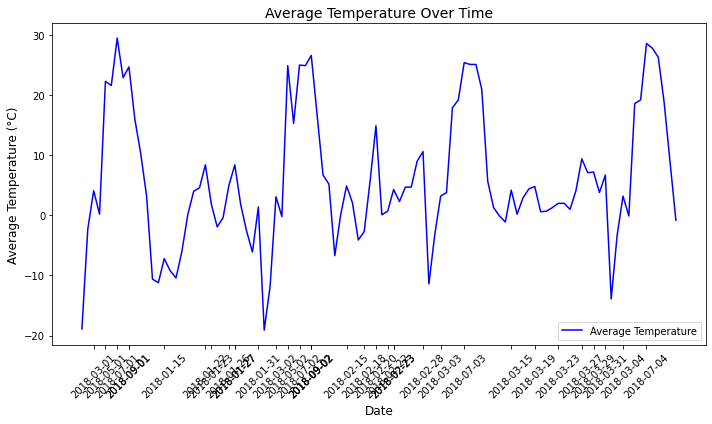

In [20]:
temperature_data = df_temp['avgTemp']

peaks, _ = find_peaks(temperature_data)

plt.figure(figsize=(10, 6))
plt.plot(df_temp.index, temperature_data, label='Average Temperature', color='blue')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)

plt.title('Average Temperature Over Time', fontsize=14)

plt.xticks(df_temp.index[peaks], rotation=45)

plt.tight_layout()
plt.legend()
plt.show()

# 04. Merging datasets

In [24]:
df_group = pd.DataFrame(final_data.groupby(['date'])['trip_id'].count()).reset_index()

In [27]:
# Rename the column 'trip_id' to 'bike_rides_daily'
df_group.rename(columns={'trip_id': 'bike_rides_daily'}, inplace=True)

# Merge df_group with final_data on the 'date' column
df = final_data.merge(df_group, on='date', how='outer', indicator=True)

# Check the counts of merge types (left_only, right_only, both)
print(df['_merge'].value_counts(dropna=False))

# Check the shape of rows for January 1st
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape)

# Check the shape of rows for January 2nd
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape)

both          449380
left_only          0
right_only         0
Name: _merge, dtype: int64
Shape of January 1st is (376, 16)
Shape of January 2nd is (4425, 16)


In [29]:
print(df.columns)

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'date', 'avgTemp',
       'bike_rides_daily', '_merge'],
      dtype='object')


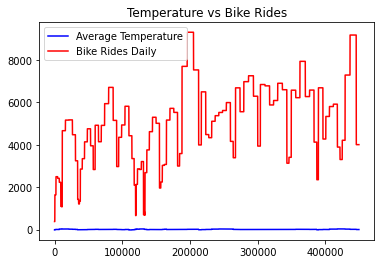

In [30]:
plt.title('Temperature vs Bike Rides')

# Plot temperature from the merged DataFrame 'df'
plt.plot(df['avgTemp'], label='Average Temperature', color='blue')

# Plot bike rides daily from the same DataFrame
plt.plot(df['bike_rides_daily'], color='red', label='Bike Rides Daily')

# Adding a legend to distinguish between the two plots
plt.legend()

# Show the plot
plt.show()

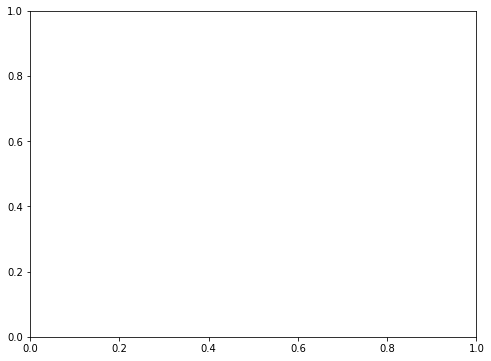

In [31]:
fig,ax = plt.subplots(figsize=(8, 6))

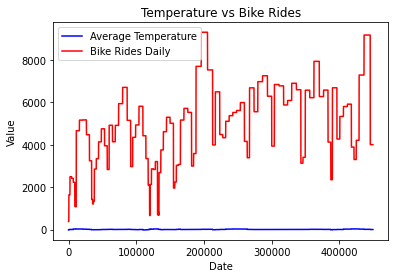

In [33]:
fig, ax = plt.subplots()

# Plot average temperature from df
ax.plot(df['avgTemp'], color='blue', label='Average Temperature')

# Plot bike rides daily from df
ax.plot(df['bike_rides_daily'], color='red', label='Bike Rides Daily')

# Set title and labels
ax.set_title('Temperature vs Bike Rides')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [35]:
ax2 = ax.twinx()
ax2.plot(df_temp["avgTemp"], color="red")

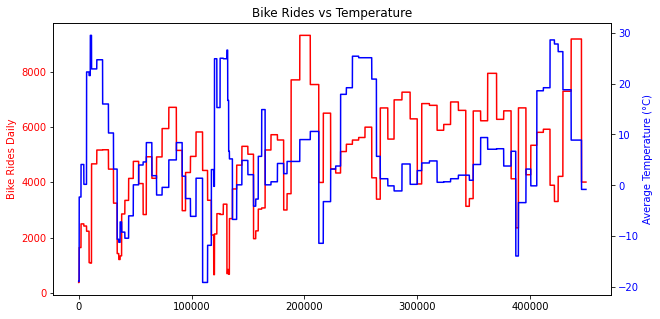

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bike rides daily on the left y-axis
ax.plot(df['bike_rides_daily'], color="red", label='Bike Rides Daily')
ax.set_ylabel('Bike Rides Daily', color='red')
ax.tick_params(axis='y', labelcolor='red')

# Create a second y-axis to plot temperature
ax2 = ax.twinx()
ax2.plot(df['avgTemp'], color="blue", label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set the title
plt.title('Bike Rides vs Temperature')

plt.show()

In this code, I used Matplotlib's Object-Oriented Interface to create a dual-axis plot, which allows plotting two different variables (bike rides and temperature) on the same x-axis but with two distinct y-axes. Here's a breakdown of the steps:

Creating the Plot:
fig, ax = plt.subplots(figsize=(10, 5)) creates a figure and a single set of axes (i.e., ax). The figsize parameter sets the size of the plot.

Plotting the First Dataset:
ax.plot(df['bike_rides_daily'], color="red") plots the daily bike rides on the primary y-axis. The color is set to red, and ax.set_ylabel() labels the left y-axis accordingly. The tick_params function ensures the tick marks on the left y-axis match the color of the line.

Adding a Second Y-Axis:
ax2 = ax.twinx() creates a secondary y-axis that shares the same x-axis as the primary axis. This is useful for visualizing two different scales (in this case, bike rides and temperature) on the same plot.

Plotting the Second Dataset:
ax2.plot(df['avgTemp'], color="blue") plots the average temperature on the second y-axis. The right y-axis is labeled and color-coded in blue using ax2.set_ylabel() and tick_params().

Title and Display:
The title is set using plt.title(), and finally, the plot is displayed with plt.show().

This approach is part of the Object-Oriented paradigm in Matplotlib, where you directly manipulate Figure and Axes objects to control the layout and behavior of the plot. This gives more flexibility compared to the Pyplot interface, especially for complex plots like dual-axis graphs.